<a href="https://colab.research.google.com/github/EmilSeyfullayev/OpenCV-Jose-Portilla/blob/main/Contour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Contour Detection

## External vs Internal Contours

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('/content/drive/MyDrive/Computer-Vision-with-Python/DATA/internal_external.png',0)

In [5]:
img.shape

(652, 1080)

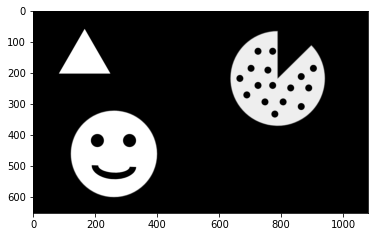

In [6]:
plt.imshow(img,cmap='gray')

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [16]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
type(contours)

list

In [18]:
len(contours)

22

In [19]:
type(hierarchy)

numpy.ndarray

In [26]:
len(contours)

22

In [25]:
print(len(contours[0]))
len(contours[1])

392


144

In [ ]:
hierarchy.shape

(1, 22, 4)

In [27]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [29]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

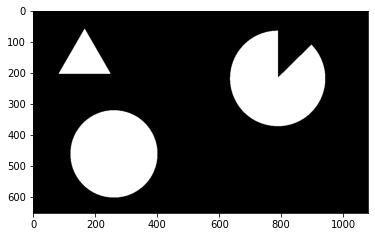

In [30]:
plt.imshow(external_contours,cmap='gray')

In [31]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

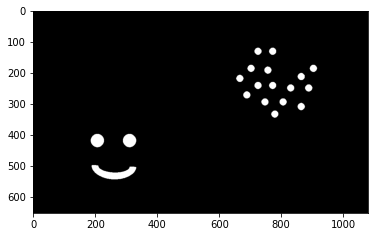

In [32]:
plt.imshow(image_internal,cmap='gray')

In [132]:
img = cv2.imread('/content/WhatsApp Image 2022-04-11 at 7.07.49 PM.jpeg', 0)

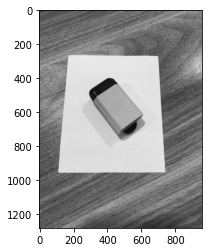

In [133]:
plt.imshow(img, cmap='gray')

In [134]:
ret, tresh = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY)

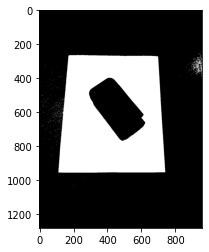

In [135]:
plt.imshow(tresh, cmap='gray')

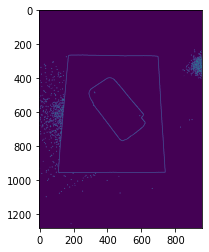

In [136]:
plt.imshow(cv2.Canny(tresh, 120, 255))

In [137]:
contours, hierarchy = cv2.findContours(tresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [138]:
len(contours)

686

In [139]:
hierarchy

array([[[  1,  -1,  -1,  -1],
        [  2,   0,  -1,  -1],
        [  3,   1,  -1,  -1],
        ...,
        [684, 682,  -1,  -1],
        [685, 683,  -1,  -1],
        [ -1, 684,  -1,  -1]]], dtype=int32)

In [140]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

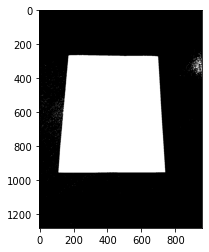

In [142]:
plt.imshow(external_contours, cmap='gray')

In [143]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

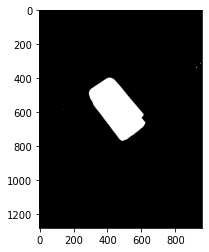

In [145]:
plt.imshow(image_internal, 'gray')